# **Implementing A Multi-layered Perceptron Using Numpy**

---




#Problem 1:

Here you must read an input file. Each line contains 785 numbers (comma delimited): the first number in each row denotes the class label: 0 corresponds to digit 0, 1 corresponds to digit 1, etc. The rest of the values are the 784 pixel values between 0 and 255 correspondig to black and white images.  As a warm up  question, load the data.

For this problem you must write a function that takes a file path as an argument which contains  this data. Your function must return two values (x and y) that contains the data from the file as  described. Specifically, the first return value (x) must be a matrix where the rows are individual  examples of images, and the columns are individual pixels (n x 784 matrix). The second return value  must be a list/array of real numbers representing the labels of the examples (rows) in x.

In [1]:
#Packages
import numpy as np
import pandas as pd

In [2]:
def read_image_data(file_path):
    x = []
    y = []

    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            values = line.strip().split(',')  # Split
            label = int(values[0])
            pixels = [float(val) for val in values[1:]]
            x.append(pixels)
            y.append(label)

    return x, y

#mnist dataset is stored in my Gdrive
x, y = read_image_data('/content/drive/MyDrive/mnist_train.csv')
print("x:", x[:2])
print("y:", y[:2])


x: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 18.0, 18.0, 18.0, 126.0, 136.0, 175.0, 26.0, 166.0, 255.0, 247.0, 127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 36.0, 94.0, 154.0, 170.0, 253.0, 253.0, 253.0, 253.0, 253.0, 225.0, 172.0, 253.0, 242.0, 19

Label for the image is  4


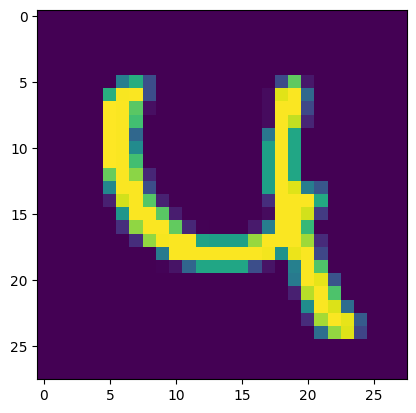

In [11]:
#Understanding the data
import matplotlib.pyplot as plt
i=6424
img=np.array(x[i])
img=img.reshape(28,28)
plt.imshow(img)
print("Label for the image is ",y[i])

#Problem 2:

Implement the backpropagation algorithm in a zero hidden layer neural network (weights between input and output nodes). The output layer should be a softmax output over 10 classes corresponding to 10 classes of handwritten digits (e.g. An architecture: 784 > 10). Your backprop code should minimize the cross-entropy function for multi-class classification problems (categorical  cross entropy).

 $\text{Loss} = - \sum_j \text{target}_j \cdot \log(\text{prediction}_j)$


where j is the class label

This step should be done with a full step of gradient descent, not stochastic gradient descent or rmsprop. For this  problem you must write a function that takes as an input a matrix of x values, a list of y values (as  returned from problem 1), a weight matrix, and a learning rate and performs a single step of  backpropagation. You will need to do both a forward step with the inputs, and then a backward prop to  get the gradients. Return the updated weight matrix and bias in the same format as it was passed.

The list of weight matrices will be a list with 1 entry where the only entry is a matrix in the  format where the rows represent all of the outgoing weights for a neuron in the input layer and the  columns represent the weights for the incoming neurons. A specific row column index will give you the  weight for a neuron to neuron connection.

The list of bias vectors will be in the form where each entry in the list is a vector with the same  length as the first set of weights. (e.g. For an architecture of 784 > 10, there will be a single element list  with a vector of size 10).

In [9]:
class Network1(object):
    def __init__(self, sizes):
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]


    def feedforward(self, a):
        z = np.dot(self.weights[0], a) + self.biases[0]
        return softmax(z)

    def gradient_descent1(self, x, y, learning_rate):
        # Forward pass
        z = np.dot(self.weights[0], x) + self.biases[0]
        activation = softmax(z)

        # Backward pass
        delta = activation - y

        nabla_b = delta
        nabla_w = np.dot(delta, x.transpose())

        # Gradient descent update
        self.weights[0] -= learning_rate * nabla_w
        self.biases[0] -= learning_rate * nabla_b
        # Compute and return loss
        loss = -np.sum(y * np.log(activation))
        return loss

def softmax(z):
    max_z = np.max(z)
    exp_scores = np.exp(z - max_z)  # Softmax normalization
    return exp_scores / np.sum(exp_scores)

In [4]:
#Packages for training and accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Loading the mnist dataset from google drive
x, y = read_image_data('/content/drive/MyDrive/mnist_train.csv')

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

#(80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

Epoch 1/100, Loss: 2.3857
Epoch 2/100, Loss: 1.3297
Epoch 3/100, Loss: 1.1096
Epoch 4/100, Loss: 0.9944
Epoch 5/100, Loss: 0.9261
Epoch 6/100, Loss: 0.8767
Epoch 7/100, Loss: 0.8436
Epoch 8/100, Loss: 0.8134
Epoch 9/100, Loss: 0.7968
Epoch 10/100, Loss: 0.7771
Epoch 11/100, Loss: 0.7668
Epoch 12/100, Loss: 0.7546
Epoch 13/100, Loss: 0.7449
Epoch 14/100, Loss: 0.7431
Epoch 15/100, Loss: 0.7347
Epoch 16/100, Loss: 0.7271
Epoch 17/100, Loss: 0.7257
Epoch 18/100, Loss: 0.7179
Epoch 19/100, Loss: 0.7161
Epoch 20/100, Loss: 0.7118
Epoch 21/100, Loss: 0.7144
Epoch 22/100, Loss: 0.7055
Epoch 23/100, Loss: 0.7060
Epoch 24/100, Loss: 0.7037
Epoch 25/100, Loss: 0.7033
Epoch 26/100, Loss: 0.6980
Epoch 27/100, Loss: 0.6994
Epoch 28/100, Loss: 0.6933
Epoch 29/100, Loss: 0.6922
Epoch 30/100, Loss: 0.6897
Epoch 31/100, Loss: 0.6916
Epoch 32/100, Loss: 0.6893
Epoch 33/100, Loss: 0.6891
Epoch 34/100, Loss: 0.6850
Epoch 35/100, Loss: 0.6895
Epoch 36/100, Loss: 0.6853
Epoch 37/100, Loss: 0.6864
Epoch 38/1

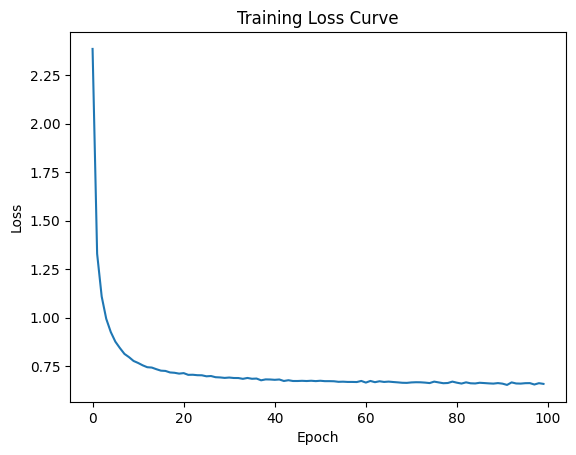

Test Accuracy: 0.879


In [12]:
net1 = Network1([784, 10])

# Train the model

def train_model(net1, x_train, y_train, learning_rate, epochs):
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for x, y in zip(x_train, y_train):
            y_one_hot = np.zeros((net1.sizes[-1], 1))
            y_one_hot[y] = 1
            loss = net1.gradient_descent1(x.reshape(-1, 1), y_one_hot, learning_rate)
            epoch_loss += loss
        epoch_loss /= len(x_train)  # Compute average loss for the epoch
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    # Plot loss curve
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()
#hyperparameters
learning_rate = 0.01
epochs = 100

# Train the model
train_model(net1, x_train, y_train, learning_rate, epochs)

# Evaluate the trained model
def evaluate_model(net, x_test, y_test):
    predictions = []
    for x, y in zip(x_test, y_test):
        output = net.feedforward(x.reshape(-1, 1))
        prediction = np.argmax(output)
        predictions.append(prediction)
    return predictions


y_pred = evaluate_model(net1, x_test, y_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


#Problem 3:

Extend your code from problem 2 to support a single layer neural network with n hidden units (e.g. An  architecture: 784 > 10 > 10). These hidden units should be using sigmoid activations.

For this problem you must write a function that takes as an input a matrix of x values, a list of y  values (as returned from problem 1), list of weight matrices, a list of bias vectors, and a learning rate and performs a single step of backpropagation. You will need to do both a forward step with the inputs to get the outputs, and then a backward prop to get the gradients. Return the  updated weight matrix and bias in the same format as it was passed.

The list of weight matrices is a list with 2 entries where each entry in the list contains a single weight matrix as previously defined in problem 2. For a network with shape 784 > 10 > 10 the passed list  of weight matrices would look like this: [matrix with shape 784x10, matrix with shape 10x10]. Note:  though a hidden layer of size 10 is used as an example here, your code must be able to support a hidden  layer of dimension n.

The list of bias vectors will be in the form where each entry in the list is a vector with the same  length as the first set of weights. (e.g. For an architecture of 784 > 10 > 10, there will be a two element  list with an vector of size 10 and a vector of size 10)

In [13]:
class Network2(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) / np.sqrt(x) for x, y in zip(sizes[:-1], sizes[1:])] #xavier initialization


    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def gradient_descent(self, x, y, learning_rate):
        # Forward pass
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            activations.append(sigmoid(z))

        # Backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b = [delta]
        nabla_w = [np.dot(delta, activations[-2].transpose())]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b.append(delta)
            nabla_w.append(np.dot(delta, activations[-l - 1].transpose()))
        nabla_b.reverse()
        nabla_w.reverse()

        # Gradient descent update
        self.weights = [w - learning_rate * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - learning_rate * nb for b, nb in zip(self.biases, nabla_b)]

    def cost_derivative(self, output_activations, y):
        return output_activations - y
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))


In [14]:
net2 = Network2([784,10,10])

In [15]:
# Load the data
x, y = read_image_data('/content/drive/MyDrive/mnist_train.csv')

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

In [16]:
# Train the model
def train_model(net2, x_train, y_train, learning_rate, epochs):
    for epoch in range(epochs):
        for x, y in zip(x_train, y_train):
            y_one_hot = np.zeros((10, 1))
            y_one_hot[y] = 1

            # Perform gradient descent update
            net2.gradient_descent(x.reshape(-1, 1), y_one_hot, learning_rate)

# hyperparameters
learning_rate = 0.01
epochs = 100

# Train the model
train_model(net2, x_train, y_train, learning_rate, epochs)

# Evaluate the trained model
def evaluate_model(net2, x_test, y_test):
    predictions = []
    for x, y in zip(x_test, y_test):
        # Forward pass
        output = net2.feedforward(x.reshape(-1, 1))
        prediction = np.argmax(output)
        predictions.append(prediction)
    return predictions

y_pred = evaluate_model(net2, x_test, y_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.911




*   From problem 3 and 4, Experimenting with Xavier intialization {self.weights = [np.random.randn(y, x) / np.sqrt(x) for x, y in zip(sizes[:-1], sizes[1:])]} helped neural netwrok with n hidden layers to increase the accuracy at some extent.




#Problem 4:

Extend your code from problem 3 (use cross entropy error) and implement a multi-layer neural  network, starting with a simple architecture containing any number of hidden units in each layer (e.g. With  architecture: 784 > 10 > 10 > 10). These hidden units should be using sigmoid activations.

For this problem you must write a function that takes as an input a matrix of x values, a list of y  values (as returned from problem 1), list of weight matrices, a list of bias vectors, and a learning rate and  performs a single step of backpropagation. You will need to do both a forward step with the inputs to  get the outputs, and then a backward prop to get the gradients. Return the updated weight matrix and  bias in the same format as it was passed.

The list of weight matrices is a list with k entries where each entry in the list contains a single  weight matrix as previously defined in problem 2. For a network with shape 784 > 10 > 10 > 10 the  passed list of weight matrices would look like this: [matrix with shape 784x10, matrix with shape 10x10,  matrix with shape 10x10]. Note: though a hidden layer of size 10 is used as an example here, your code  must be able to support a hidden layer of dimension n.

The list of bias vectors will be in the form where each entry in the list is a vector with the same  length as the first set of weights. (e.g. For an architecture of 784 > 10 > 10, there will be a two element  list with an vector of size 10 and a vector of size 10)

In [17]:
import numpy as np

class Network3(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        #self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.weights = [np.random.randn(y, x) / np.sqrt(x) for x, y in zip(sizes[:-1], sizes[1:])] #xavier initialization

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def gradient_descent3(self, x, y, learning_rate):
        # Forward pass
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)

        # Backward pass
        delta = self.cost_derivative(activations[-1], y)
        nabla_b = [np.sum(delta, axis=1, keepdims=True)]
        nabla_w = [np.dot(delta, activations[-2].transpose())]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b.insert(0, np.sum(delta, axis=1, keepdims=True))
            nabla_w.insert(0, np.dot(delta, activations[-l - 1].transpose()))

        # Gradient descent update
        self.weights = [w - learning_rate * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - learning_rate * nb for b, nb in zip(self.biases, nabla_b)]

    def cost_derivative(self, output_activations, y):
        return (output_activations - y)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))


In [18]:
net3 = Network3([784,10,10,10])

In [19]:
# Load the data
x, y = read_image_data('/content/drive/MyDrive/mnist_train.csv')

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Split the data into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

In [20]:
# Train the model
def train_model(net3, x_train, y_train, learning_rate, epochs):
    for epoch in range(epochs):
        for x, y in zip(x_train, y_train):
            y_one_hot = np.zeros((10, 1))
            y_one_hot[y] = 1

            net3.gradient_descent3(x.reshape(-1, 1), y_one_hot, learning_rate)

# Hyperparameters
learning_rate = 0.01
epochs = 100

# Train the model
train_model(net3, x_train, y_train, learning_rate, epochs)

# Evaluate the trained model
def evaluate_model(net3, x_test, y_test):
    predictions = []
    for x, y in zip(x_test, y_test):
        # Forward pass
        output = net3.feedforward(x.reshape(-1, 1))
        prediction = np.argmax(output)
        predictions.append(prediction)
    return predictions

y_pred = evaluate_model(net3, x_test, y_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.913




*   Multi-layered neural network and neural network with n hidden layers shows an increased accuracy while performing xavier initialization.




#Problem 5:

Extend your code from problem 4 to implement different activations functions which will be  passed as a parameter. In this problem all activations (except the final layer which should remain a  softmax) must be changed to the passed activation function.

In [21]:
class Network4(object):
    def __init__(self, sizes, activation_function):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) / np.sqrt(x) for x, y in zip(sizes[:-1], sizes[1:])] # Xavier initialization
        self.activation_function = activation_function

    def feedforward(self, a):
        for b, w in zip(self.biases[:-1], self.weights[:-1]):
            a = self.activation_function(np.dot(w, a) + b)
        z_output = np.dot(self.weights[-1], a) + self.biases[-1]
        output = softmax(z_output)
        return output

    def gradient_descent4(self, x, y, learning_rate):
        # Forward pass
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.activation_function(z)
            activations.append(activation)

        # Backward pass
        delta = self.cost_derivative(activations[-1], y)
        nabla_b = [np.sum(delta, axis=1, keepdims=True)]
        nabla_w = [np.dot(delta, activations[-2].transpose())]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.activation_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b.insert(0, np.sum(delta, axis=1, keepdims=True))
            nabla_w.insert(0, np.dot(delta, activations[-l - 1].transpose()))

        # Gradient descent update
        self.weights = [w - learning_rate * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - learning_rate * nb for b, nb in zip(self.biases, nabla_b)]

    def cost_derivative(self, output_activations, y):
        return (output_activations - y)

    def activation_prime(self, z):
        if self.activation_function == sigmoid:
            return sigmoid_prime(z)
        elif self.activation_function == relu:
            return relu_prime(z)
        elif self.activation_function == tanh:
            return tanh_prime(z)
        elif self.activation_function == leaky_relu:
            return leaky_relu_prime(z)

# Define activation functions
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_prime(z):
    return np.where(z > 0, 1, 0)

def tanh(z):
    return np.tanh(z)

def tanh_prime(z):
    return 1 - np.tanh(z)**2

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, z * alpha)

def leaky_relu_prime(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

def softmax(z):
    max_z = np.max(z)
    exp_scores = np.exp(z - max_z)
    return exp_scores / np.sum(exp_scores)




*   Here it is necessary to use Xavier initialization to get a proper accuracy




#Leaky ReLu

In [22]:
sizes = [784, 10, 10, 10]
activation_function = leaky_relu
netlr = Network4(sizes, activation_function)

In [23]:
#Train the model
def train_model(netlr, x_train, y_train, learning_rate, epochs):
    for epoch in range(epochs):
        for x, y in zip(x_train, y_train):
            y_one_hot = np.zeros((10, 1))
            y_one_hot[y] = 1
            netlr.gradient_descent4(x.reshape(-1, 1), y_one_hot, learning_rate)

#hyperparameters
learning_rate = 0.01
epochs = 100

# Train the model
train_model(netlr, x_train, y_train, learning_rate, epochs)

# Evaluate the trained model
def evaluate_model(netlr, x_test, y_test):
    predictions = []
    for x, y in zip(x_test, y_test):
        # Forward pass
        output = netlr.feedforward(x.reshape(-1, 1))
        prediction = np.argmax(output)
        predictions.append(prediction)
    return predictions
y_pred = evaluate_model(netlr, x_test, y_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9184166666666667


#Sigmoid


In [24]:
sizes = [784, 10, 10, 10]
activation_function = sigmoid
nets = Network4(sizes, activation_function)

In [25]:
#Train the model
def train_model(nets, x_train, y_train, learning_rate, epochs):
    for epoch in range(epochs):
        for x, y in zip(x_train, y_train):
            y_one_hot = np.zeros((10, 1))
            y_one_hot[y] = 1
            nets.gradient_descent4(x.reshape(-1, 1), y_one_hot, learning_rate)

# hyperparameters
learning_rate = 0.01
epochs = 100

# Train the model
train_model(nets, x_train, y_train, learning_rate, epochs)

# Evaluate the trained model
def evaluate_model(nets, x_test, y_test):
    predictions = []
    for x, y in zip(x_test, y_test):
        # Forward pass
        output = nets.feedforward(x.reshape(-1, 1))
        prediction = np.argmax(output)
        predictions.append(prediction)
    return predictions
y_pred = evaluate_model(nets, x_test, y_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.90725


#ReLu


In [ ]:
sizes = [784, 10, 10, 10]
activation_function = relu
netr = Network4(sizes, activation_function)

In [ ]:
#Train the model
def train_model(netr, x_train, y_train, learning_rate, epochs):
    for epoch in range(epochs):
        for x, y in zip(x_train, y_train):
            y_one_hot = np.zeros((10, 1))
            y_one_hot[y] = 1
            netr.gradient_descent4(x.reshape(-1, 1), y_one_hot, learning_rate)

# hyperparameters
learning_rate = 0.01
epochs = 10

# Train the model
train_model(netr, x_train, y_train, learning_rate, epochs)

# Evaluate the trained model
def evaluate_model(netr, x_test, y_test):
    predictions = []
    for x, y in zip(x_test, y_test):
        # Forward pass
        output = netr.feedforward(x.reshape(-1, 1))
        prediction = np.argmax(output)
        predictions.append(prediction)
    return predictions
y_pred = evaluate_model(netr, x_test, y_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8941666666666667


#tanh

In [ ]:
sizes = [784, 10, 10, 10]
activation_function = tanh
nett = Network4(sizes, activation_function)

In [ ]:
#Train the model
def train_model(nett, x_train, y_train, learning_rate, epochs):
    for epoch in range(epochs):
        for x, y in zip(x_train, y_train):
            y_one_hot = np.zeros((10, 1))
            y_one_hot[y] = 1
            nett.gradient_descent4(x.reshape(-1, 1), y_one_hot, learning_rate)

# hyperparameters
learning_rate = 0.01
epochs = 10

# Train the model
train_model(nett, x_train, y_train, learning_rate, epochs)

# Evaluate the trained model
def evaluate_model(nett, x_test, y_test):
    predictions = []
    for x, y in zip(x_test, y_test):
        # Forward pass
        output = nett.feedforward(x.reshape(-1, 1))
        prediction = np.argmax(output)
        predictions.append(prediction)
    return predictions
y_pred = evaluate_model(nett, x_test, y_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7325833333333334




*   In problem 5, it is better to use Leaky ReLu. It gave accuracy of around 92% which is greter than sigmoid, ReLu and tanh



#Problem 6:

Extend your code from problem 5 to implement momentum with your gradient descent. The  momentum value will be passed as a parameter. Your function should perform “epoch” number of  epochs and return the resulting weights.

In [26]:
class NetworkM(object):
    def __init__(self, sizes, activation_function):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) / np.sqrt(x) for x, y in zip(sizes[:-1], sizes[1:])] # Xavier initialization
        self.activation_function = activation_function
        self.prev_delta_w = [np.zeros((y, x)) for x, y in zip(sizes[:-1], sizes[1:])]
        self.prev_delta_b = [np.zeros((y, 1)) for y in sizes[1:]]


    def feedforward(self, a):
        for b, w in zip(self.biases[:-1], self.weights[:-1]):
            a = self.activation_function(np.dot(w, a) + b)
        z_output = np.dot(self.weights[-1], a) + self.biases[-1]
        output = softmax(z_output)
        return output

    def gradient_descentM(self, x, y, learning_rate, momentum):
        # Forward pass
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.activation_function(z)
            activations.append(activation)

        # Backward pass
        delta = self.cost_derivative(activations[-1], y)
        nabla_b = [np.sum(delta, axis=1, keepdims=True)]
        nabla_w = [np.dot(delta, activations[-2].transpose())]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.activation_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b.insert(0, np.sum(delta, axis=1, keepdims=True))
            nabla_w.insert(0, np.dot(delta, activations[-l - 1].transpose()))

        # Gradient descent update with momentum
        self.weights = [w - learning_rate * nw - momentum * pdw for w, nw, pdw in zip(self.weights, nabla_w, self.prev_delta_w)]
        self.biases = [b - learning_rate * nb - momentum * pdb for b, nb, pdb in zip(self.biases, nabla_b, self.prev_delta_b)]
        self.prev_delta_w = nabla_w
        self.prev_delta_b = nabla_b

    def cost_derivative(self, output_activations, y):
        return (output_activations - y)

    def activation_prime(self, z):
        if self.activation_function == sigmoid:
            return sigmoid_prime(z)
        elif self.activation_function == relu:
            return relu_prime(z)
        elif self.activation_function == tanh:
            return tanh_prime(z)
        elif self.activation_function == leaky_relu:
            return leaky_relu_prime(z)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -709, 709)))


def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_prime(z):
    return np.where(z > 0, 1, 0)

def tanh(z):
    return np.tanh(z)

def tanh_prime(z):
    return 1 - np.tanh(z)**2

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, z * alpha)

def leaky_relu_prime(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

def softmax(z):
    max_z = np.max(z)
    exp_scores = np.exp(z - max_z)  # Softmax normalization
    return exp_scores / np.sum(exp_scores)


#Sigmoid


In [27]:
sizes = [784, 10, 10, 10]
activation_function = sigmoid
netM = NetworkM(sizes, activation_function)

# Train the model with momentum
def train_model_with_momentum(netM, x_train, y_train, learning_rate, momentum, epochs):
    for epoch in range(epochs):
        for x, y in zip(x_train, y_train):
            y_one_hot = np.zeros((10, 1))
            y_one_hot[y] = 1


            netM.gradient_descentM(x.reshape(-1, 1), y_one_hot, learning_rate, momentum)

# hyperparameters
learning_rate = .001
momentum = 0.1
epochs = 100

# Train the model
train_model_with_momentum(netM, x_train, y_train, learning_rate, momentum, epochs)

# Evaluate the trained model
y_pred = evaluate_model(netM, x_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.89575


Activation function: Sigmoid

*   For Learning_rate=0.01, momentum =0.1 and epochs=10: Accuracy = 85%
*   learning_rate = 0.001, momentum = 0.01 and epochs = 10: Accuracy = 90%
*   learning_rate = 0.0001, momentum = 0.01 and epochs = 10: Accuracy = 90.4%
*   learning_rate = 0.0001, momentum = 0.001 and epochs = 10: Accuracy = 90.2%
*   learning_rate = 0.001, momentum = 0.2 and epochs = 10: Accuracy = 82.8%
*   learning_rate = 0.001, momentum = 0.05 and epochs = 10: Accuracy = 90.2%
*   learning_rate = 0.0001, momentum = 0.005 and epochs = 10: Accuracy = 91.2%
*   learning_rate = 0.001, momentum = 0.1 and epochs = 100: Accuracy = 89.5%


